| CHARTS | Resource Management |
| ----------- | ----------- |

In [53]:
import xlwings as xw
from openpyxl import Workbook, load_workbook
import xlsxwriter 

import pandas as pd
import numpy as np
import datetime as dt 
import time
import sys

"""
Latest xlwings release: v0.27.15
https://www.xlwings.org/

"""
xw.__version__ 

# Plots
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'plotly'

"""
IMPORTANT - MacOS
Use appscript k function as a workaround because I use a macOS operating system
""" 
from appscript import k

In [54]:
# Reopen workbookk
book_number = 'book01.xlsx'
wb = xw.Book(book_number)
sheet = wb.sheets[0]

In [55]:
# Set roles / RATES named range
sheet['A116:G123'].name = 'rrates_nr'

In [56]:
# Create a list of
role_list = sheet['rrates_nr'][0:,0].value

role_list

['role', 'EM', 'BPC', 'BA', 'TA', 'TC', 'TCO', 'QAE']

In [57]:
# Set roles / HOURS named range
sheet['D127:G134'].name = 'rhours_nr'

In [58]:
hc_list = sheet['rhours_nr'][0:,0:].options(ndim=2).value

hc_list

[['ROLE', 'HOURS', 'COST', 'RATE'],
 ['EM', 58.0, 11600.0, 200.0],
 ['BPC', 225.0, 56250.0, 250.0],
 ['BA', 5.0, 775.0, 155.0],
 ['TA', 121.0, 23595.0, 195.0],
 ['TC', 592.0, 103600.0, 175.0],
 ['TCO', 0.0, 0.0, 115.0],
 ['QAE', 66.0, 7590.0, 115.0]]

In [59]:
# Create data frame from list
hc_df = pd.DataFrame(hc_list, columns=['ROLE', 'HOURS', 'COST', 'RATE'])

# Filter extra header row from data frame
hc_df = hc_df.iloc[1:,:]

hc_df

,ROLE,HOURS,COST,RATE
1,EM,58.0,11600.0,200.0
2,BPC,225.0,56250.0,250.0
3,BA,5.0,775.0,155.0
4,TA,121.0,23595.0,195.0
5,TC,592.0,103600.0,175.0
6,TCO,0.0,0.0,115.0
7,QAE,66.0,7590.0,115.0


Text(0.5, 1.0, 'Hours Breakdown By Role')

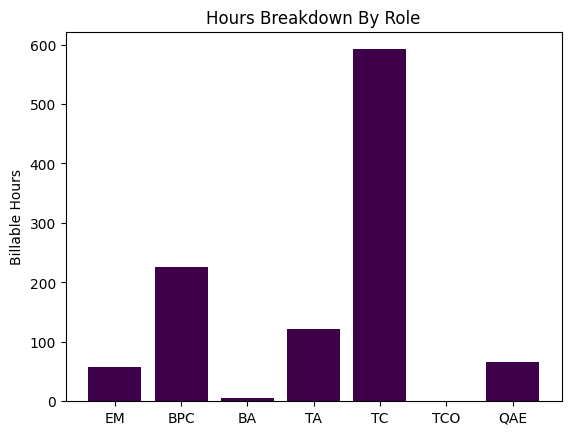

In [60]:
"""      
Matplotlib - HOURS
"""
fig = plt.figure()
x = hc_df['ROLE']
y = hc_df['HOURS']
plt.bar(x,y,color='#3E0049')
plt.grid(False)
plt.ylabel('Billable Hours')
plt.title('Hours Breakdown By Role')

In [61]:
# Create a named range for plots
sheet['A127:C160'].name = 'charts_nr'

In [62]:
# Add hours plot to excel doc
sheet.pictures.add(
    fig,
    name='hours_breakdown',
    update=True, # CAREFUL - okay for first but his replaces an existing picture
    left=sheet['charts_nr'][0].left,
    top=sheet['charts_nr'][1].top,
    height=500,
    width=600
)

<Picture 'hours_breakdown' in <Sheet [book01.xlsx]Sheet1>>

Text(0.5, 1.0, 'Cost Breakdown By Role')

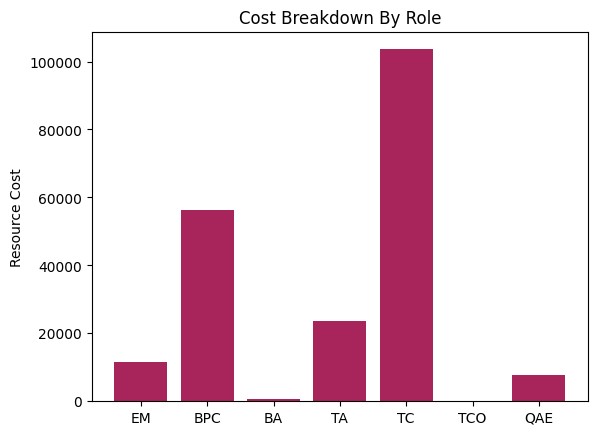

In [63]:
"""      
Matplotlib - COST
"""
fig2 = plt.figure()
x2 = hc_df['ROLE']
y2 = hc_df['COST']
plt.bar(x2,y2,color='#A8255C')
plt.grid(False)
plt.ylabel('Resource Cost')
plt.title('Cost Breakdown By Role')

In [64]:
# Add resource cost plot to excel doc
sheet.pictures.add(
    fig2,
    name='cost_breakdown',
    update=True,
    left=sheet['charts_nr'][0].left,
    top=sheet['charts_nr'][100].top,
    height=500,
    width=600
)

<Picture 'cost_breakdown' in <Sheet [book01.xlsx]Sheet1>>

In [65]:
# Save workbook BUT leave open
book_number = 'book01.xlsx'
wb.save(book_number)

| END OF PROGRAM |
| ----------- |